In [158]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,cross_val_score, KFold
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# rmse
def regression_result(y_true,y_pred):
    mse=metrics.mean_squared_error(y_true, y_pred)
    rmse=round(np.sqrt(mse),4)
    return rmse
    
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

rmse_score = make_scorer(rmse, greater_is_better = False)

In [100]:
df = pd.read_csv('DataML2.csv')

In [101]:
df['period'] = pd.to_datetime(df['period'], format='%b-%y')
df

,period,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
0,2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
105,2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
106,2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419
107,2020-12-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,4.225806,-6.548387,-25.580645,-24.677419,9.935484,-9.478495,45.322294,38.623498,41.747653,32.130951


In [102]:
df.index.name = None
df

,period,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
0,2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
105,2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
106,2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419
107,2020-12-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,...,4.225806,-6.548387,-25.580645,-24.677419,9.935484,-9.478495,45.322294,38.623498,41.747653,32.130951


In [103]:
df = df.set_index('period')
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
2020-10-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
2020-11-01,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419


In [87]:
df = df.drop(columns=['period'])
df.index.name='period'

In [6]:
df = df.drop(columns=['period'])

In [7]:
df.index.name='period'

In [88]:
df

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
period,,,,,,,,,,,,,,,,,,,,,
0,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.110087,5.780286,5.547299,6.200196,7.742390,6.986212,6.842575,11.053824,5.456052,11.224086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.207811,6.967163,5.511730,6.871508,16.776838,10.131111,1.713118,15.426255,6.618118,19.656792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-3.485374,-4.001398,-4.046090,-1.967292,9.759699,-6.479756,-11.657055,-23.003171,-5.600000,-8.989116,...,-2.333333,-10.366667,-36.000000,-18.866667,11.766667,-12.188889,37.466078,27.929502,32.982781,29.337052
105,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,0.064516,-7.645161,-32.193548,-23.000000,9.774194,-11.833333,40.786587,34.514693,34.757150,31.410465
106,-2.194768,-3.582511,-3.614345,-2.138715,1.757572,-6.151957,-7.211662,-13.517052,-6.633814,-4.708003,...,-0.466667,-12.666667,-29.300000,-20.966667,7.300000,-12.066667,43.031193,35.586534,38.456308,28.422419


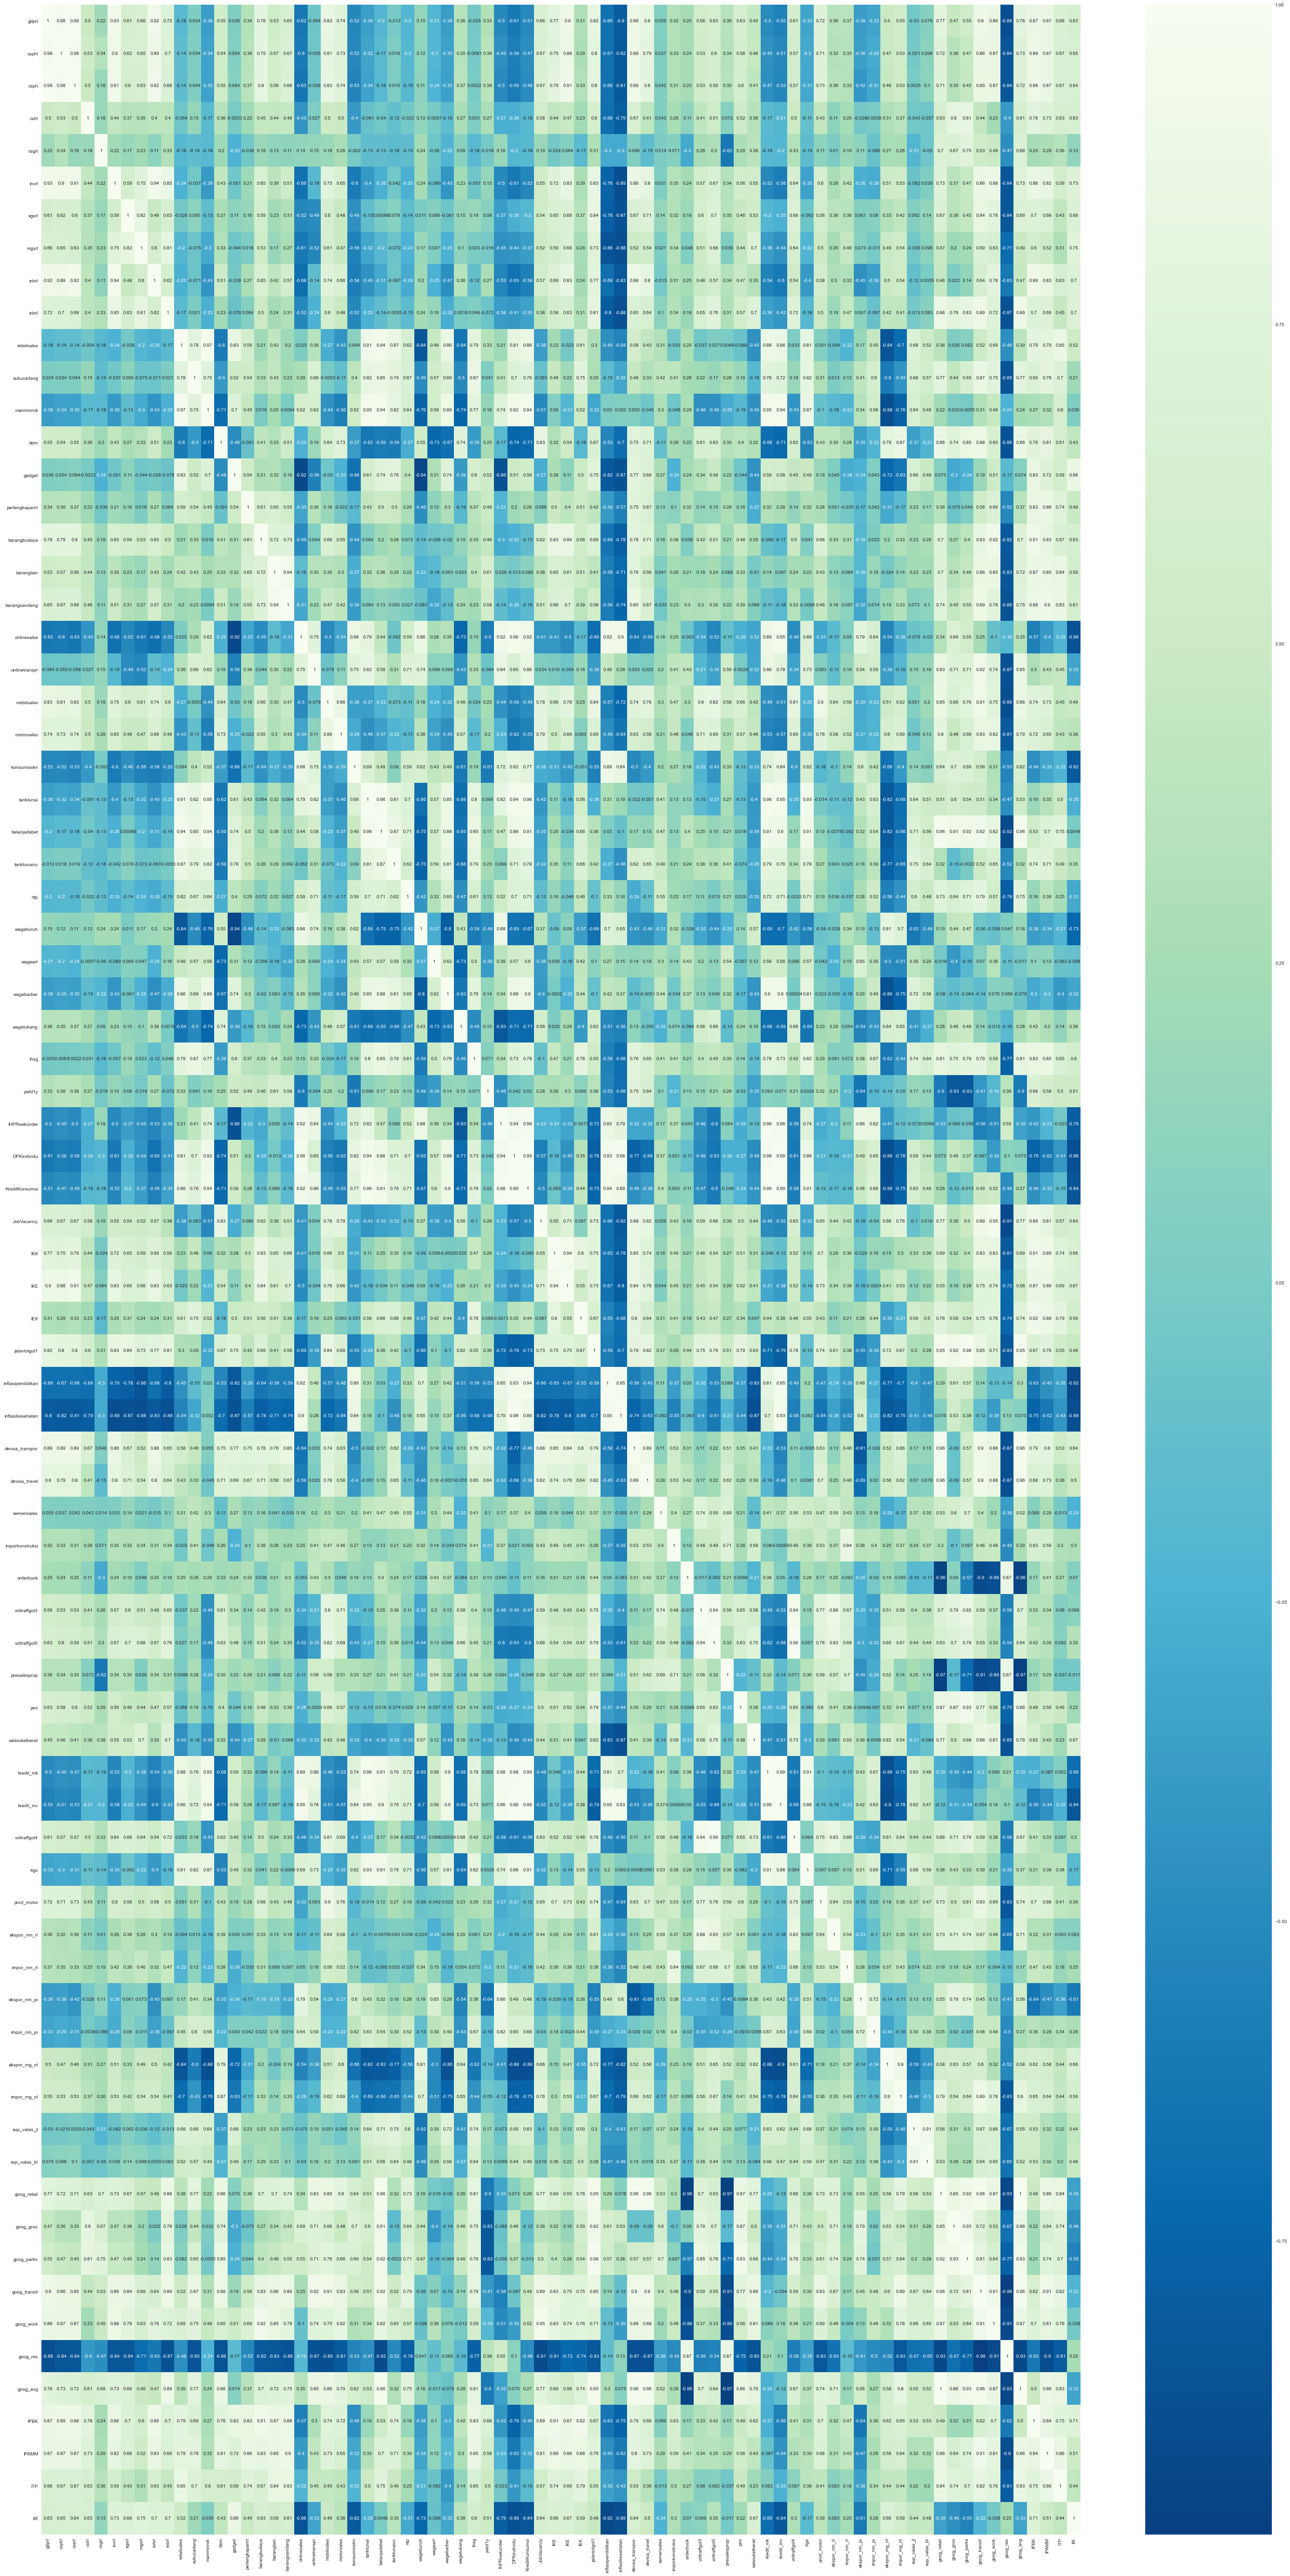

In [15]:
#data correlation
corr = df.corr()

#visualizing
fig, ax = plt.subplots(figsize=(50,100))
plt.style.use('seaborn')
sns.heatmap(data=corr, annot=True, cmap='GnBu_r')
plt.show()

In [18]:
corr.head(50)

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
gdprl,1.000000,0.978874,0.994296,0.496531,0.215670,0.928231,0.611453,0.660267,0.921508,0.717449,...,0.465118,0.552874,0.896357,0.858076,-0.883040,0.781277,0.870639,0.871184,0.663542,0.626175
csplrl,0.978874,1.000000,0.978411,0.529687,0.338500,0.900556,0.619980,0.647473,0.892329,0.696087,...,0.363737,0.466595,0.857645,0.874464,-0.841906,0.728327,0.887312,0.871146,0.672108,0.649089
csprl,0.994296,0.978411,1.000000,0.495257,0.178262,0.911798,0.601692,0.631473,0.922687,0.677886,...,0.348373,0.451290,0.850553,0.871569,-0.835488,0.717437,0.884337,0.869658,0.667920,0.644369
cslrl,0.496531,0.529687,0.495257,1.000000,0.181652,0.440700,0.365512,0.348291,0.400379,0.396258,...,0.799998,0.808080,0.438335,0.232881,-0.402882,0.614834,0.781040,0.725685,0.633140,0.631503
csgrl,0.215670,0.338500,0.178262,0.181652,1.000000,0.220737,0.168299,0.232765,0.111312,0.330206,...,0.667312,0.752270,0.529521,0.488950,-0.472770,0.677706,0.244835,0.292903,0.358556,0.133802
invrl,0.928231,0.900556,0.911798,0.440700,0.220737,1.000000,0.593045,0.754886,0.935959,0.853857,...,0.366751,0.471828,0.858460,0.878832,-0.841408,0.732369,0.858816,0.816096,0.590855,0.728677
xgsrl,0.611453,0.619980,0.601692,0.365512,0.168299,0.593045,1.000000,0.821350,0.477633,0.631309,...,0.382052,0.445538,0.837919,0.777319,-0.839222,0.687302,0.702811,0.677052,0.434392,0.684638
mgsrl,0.660267,0.647473,0.631473,0.348291,0.232765,0.754886,0.821350,1.000000,0.598437,0.812516,...,0.202320,0.237193,0.687153,0.627418,-0.706032,0.494747,0.595342,0.515239,0.307184,0.750130
inhrl,0.921508,0.892329,0.922687,0.400379,0.111312,0.935959,0.477633,0.598437,1.000000,0.616470,...,0.022381,0.137228,0.640070,0.778138,-0.629231,0.465051,0.894602,0.833676,0.632110,0.697916
inbrl,0.717449,0.696087,0.677886,0.396258,0.330206,0.853857,0.631309,0.812516,0.616470,1.000000,...,0.775759,0.827569,0.887513,0.716089,-0.866496,0.885945,0.698931,0.692647,0.453967,0.695200


In [25]:
corr.iloc[0:51]
#inhrl: gdprl, csplrl, csprl, invrl, ike, devisa_transpor, devisa_travel, jalantolgol, mobilsales, IKK, motorsales
#inbrl: invrl, mgsrl, jalantolgol, voltraffgol5, CSPLRL

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
gdprl,1.000000,0.978874,0.994296,0.496531,0.215670,0.928231,0.611453,0.660267,0.921508,0.717449,...,0.465118,0.552874,0.896357,0.858076,-0.883040,0.781277,0.870639,0.871184,0.663542,0.626175
csplrl,0.978874,1.000000,0.978411,0.529687,0.338500,0.900556,0.619980,0.647473,0.892329,0.696087,...,0.363737,0.466595,0.857645,0.874464,-0.841906,0.728327,0.887312,0.871146,0.672108,0.649089
csprl,0.994296,0.978411,1.000000,0.495257,0.178262,0.911798,0.601692,0.631473,0.922687,0.677886,...,0.348373,0.451290,0.850553,0.871569,-0.835488,0.717437,0.884337,0.869658,0.667920,0.644369
cslrl,0.496531,0.529687,0.495257,1.000000,0.181652,0.440700,0.365512,0.348291,0.400379,0.396258,...,0.799998,0.808080,0.438335,0.232881,-0.402882,0.614834,0.781040,0.725685,0.633140,0.631503
csgrl,0.215670,0.338500,0.178262,0.181652,1.000000,0.220737,0.168299,0.232765,0.111312,0.330206,...,0.667312,0.752270,0.529521,0.488950,-0.472770,0.677706,0.244835,0.292903,0.358556,0.133802
invrl,0.928231,0.900556,0.911798,0.440700,0.220737,1.000000,0.593045,0.754886,0.935959,0.853857,...,0.366751,0.471828,0.858460,0.878832,-0.841408,0.732369,0.858816,0.816096,0.590855,0.728677
xgsrl,0.611453,0.619980,0.601692,0.365512,0.168299,0.593045,1.000000,0.821350,0.477633,0.631309,...,0.382052,0.445538,0.837919,0.777319,-0.839222,0.687302,0.702811,0.677052,0.434392,0.684638
mgsrl,0.660267,0.647473,0.631473,0.348291,0.232765,0.754886,0.821350,1.000000,0.598437,0.812516,...,0.202320,0.237193,0.687153,0.627418,-0.706032,0.494747,0.595342,0.515239,0.307184,0.750130
inhrl,0.921508,0.892329,0.922687,0.400379,0.111312,0.935959,0.477633,0.598437,1.000000,0.616470,...,0.022381,0.137228,0.640070,0.778138,-0.629231,0.465051,0.894602,0.833676,0.632110,0.697916
inbrl,0.717449,0.696087,0.677886,0.396258,0.330206,0.853857,0.631309,0.812516,0.616470,1.000000,...,0.775759,0.827569,0.887513,0.716089,-0.866496,0.885945,0.698931,0.692647,0.453967,0.695200


In [26]:
corr.iloc[51:79]
#inhrl: ipbk, ipamm, goog_work, IIK
#inbrl: goog_retail, goog_groc, goog_parks, goog_transit, goog_avg, salesalatberat, voltraffgol4, goog_work, IPBK, IIK

,gdprl,csplrl,csprl,cslrl,csgrl,invrl,xgsrl,mgsrl,inhrl,inbrl,...,goog_groc,goog_parks,goog_transit,goog_work,goog_res,goog_avg,IPBK,IPAMM,ITP,IIK
presalesprop,0.361230,0.344170,0.350720,0.071755,-0.622713,0.335390,0.354935,0.039063,0.337232,0.310130,...,-0.173675,-0.710478,-0.910769,-0.888514,0.870590,-0.971628,0.168553,0.290301,-0.037452,-0.017441
pmi,0.629804,0.583663,0.595036,0.515459,0.294647,0.560370,0.458930,0.440769,0.474031,0.567299,...,0.866850,0.928980,0.770865,0.559626,-0.753014,0.858381,0.492302,0.558204,0.490083,0.223864
salesalatberat,0.449330,0.463975,0.405387,0.359135,0.377702,0.546697,0.531057,0.695597,0.346070,0.703494,...,0.501247,0.684383,0.855548,0.806925,-0.849701,0.789900,0.620605,0.426062,0.226124,0.668927
kredit_mk,-0.495863,-0.449839,-0.466581,-0.172709,-0.186942,-0.518812,-0.200869,-0.383202,-0.544971,-0.360328,...,-0.392361,-0.438726,-0.195811,0.088572,0.214073,-0.246477,-0.266323,-0.087448,0.061689,-0.686314
kredit_inv,-0.553719,-0.509119,-0.525075,-0.210794,-0.201261,-0.583139,-0.253943,-0.444011,-0.601745,-0.421413,...,-0.314551,-0.336899,-0.053840,0.179764,0.104941,-0.123631,-0.561177,-0.444997,-0.252861,-0.835599
voltraffgol4,0.605246,0.574838,0.572599,0.504958,0.328545,0.638227,0.676094,0.638908,0.540573,0.723475,...,0.705497,0.789216,0.587048,0.377767,-0.577916,0.669445,0.407331,0.329162,0.096707,0.302021
rtgs,-0.327514,-0.299890,-0.312859,-0.110845,-0.144787,-0.345190,-0.062023,-0.218681,-0.398243,-0.184072,...,0.426530,0.330988,0.391012,0.206054,-0.348544,0.372488,0.306132,0.386441,0.379452,-0.172426
prod_motor,0.721450,0.713089,0.726580,0.429430,0.106316,0.602703,0.575427,0.503163,0.579332,0.499613,...,0.498478,0.606321,0.829958,0.689606,-0.829340,0.736282,0.696792,0.683014,0.410519,0.385314
ekspor_nm_rl,0.364127,0.320245,0.359255,0.109276,0.010058,0.276615,0.382696,0.264050,0.300127,0.192342,...,0.713320,0.740047,0.672869,0.462756,-0.651377,0.713559,0.315221,0.312388,0.093479,0.083423
impor_nm_rl,0.368134,0.349359,0.331388,0.252802,0.186643,0.417562,0.364973,0.458297,0.324099,0.465914,...,0.194224,0.240202,0.170018,-0.004027,-0.148473,0.172628,0.466939,0.432397,0.175565,0.247060


In [35]:
inhrlcor = df[['gdprl', 'csplrl', 'csprl', 'invrl','IKE', 'devisa_transpor','devisa_travel','jalantolgol1',
              'mobilsales','motorsales','IKK','IPBK','IPAMM','IIK','goog_work', 'inhrl']]
inhrlcor

,gdprl,csplrl,csprl,invrl,IKE,devisa_transpor,devisa_travel,jalantolgol1,mobilsales,motorsales,IKK,IPBK,IPAMM,IIK,goog_work,inhrl
period,,,,,,,,,,,,,,,,
0,6.110087,5.780286,5.547299,6.986212,110.900000,NaN,NaN,NaN,76427,645863,119.200000,NaN,NaN,NaN,NaN,5.456052
1,6.110087,5.780286,5.547299,6.986212,103.500000,NaN,NaN,NaN,86486,666136,111.700000,NaN,NaN,NaN,NaN,5.456052
2,6.110087,5.780286,5.547299,6.986212,102.400000,NaN,NaN,NaN,87917,619678,107.300000,NaN,NaN,NaN,NaN,5.456052
3,6.207811,6.967163,5.511730,10.131111,97.600000,NaN,NaN,NaN,87144,617508,102.500000,NaN,NaN,NaN,NaN,6.618118
4,6.207811,6.967163,5.511730,10.131111,103.800000,NaN,NaN,NaN,95541,611251,109.000000,NaN,NaN,NaN,NaN,6.618118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-3.485374,-4.001398,-4.046090,-6.479756,54.135689,18.0,447.0,46843691.0,48554,380713,83.357487,37.466078,27.929502,29.337052,-18.866667,-5.600000
105,-2.194768,-3.582511,-3.614345,-6.151957,51.463568,18.0,447.0,46843691.0,49018,317830,79.018127,40.786587,34.514693,31.410465,-23.000000,-6.633814
106,-2.194768,-3.582511,-3.614345,-6.151957,60.142087,18.0,447.0,46843691.0,53834,237035,92.026110,43.031193,35.586534,28.422419,-20.966667,-6.633814


In [39]:
inbrlcor = df[['invrl', 'mgsrl', 'voltraffgol5', 'jalantolgol1','csplrl', 'goog_retail', 'goog_groc', 'goog_parks', 
               'goog_transit', 'goog_avg', 'salesalatberat', 'voltraffgol4', 'goog_work', 'IPBK', 'IIK', 'inbrl']]
inbrlcor

,invrl,mgsrl,voltraffgol5,jalantolgol1,csplrl,goog_retail,goog_groc,goog_parks,goog_transit,goog_avg,salesalatberat,voltraffgol4,goog_work,IPBK,IIK,inbrl
period,,,,,,,,,,,,,,,,
0,6.986212,11.053824,NaN,NaN,5.780286,NaN,NaN,NaN,NaN,NaN,617.0,NaN,NaN,NaN,NaN,11.224086
1,6.986212,11.053824,NaN,NaN,5.780286,NaN,NaN,NaN,NaN,NaN,769.0,NaN,NaN,NaN,NaN,11.224086
2,6.986212,11.053824,NaN,NaN,5.780286,NaN,NaN,NaN,NaN,NaN,821.0,NaN,NaN,NaN,NaN,11.224086
3,10.131111,15.426255,NaN,NaN,6.967163,NaN,NaN,NaN,NaN,NaN,749.0,NaN,NaN,NaN,NaN,19.656792
4,10.131111,15.426255,NaN,NaN,6.967163,NaN,NaN,NaN,NaN,NaN,773.0,NaN,NaN,NaN,NaN,19.656792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-6.479756,-23.003171,505951.0,46843691.0,-4.001398,-17.333333,-2.333333,-10.366667,-36.000000,-12.188889,148.0,702246.0,-18.866667,37.466078,29.337052,-8.989116
105,-6.151957,-13.517052,505951.0,46843691.0,-3.582511,-18.000000,0.064516,-7.645161,-32.193548,-11.833333,154.0,702246.0,-23.000000,40.786587,31.410465,-4.708003
106,-6.151957,-13.517052,505951.0,46843691.0,-3.582511,-16.300000,-0.466667,-12.666667,-29.300000,-12.066667,136.0,702246.0,-20.966667,43.031193,28.422419,-4.708003


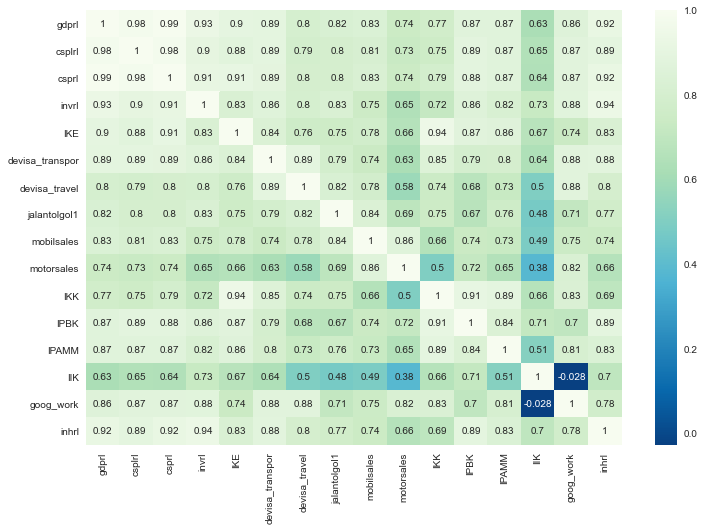

In [36]:
inhrlcorr = inhrlcor.corr()
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('seaborn')
sns.heatmap(data=inhrlcorr, annot=True, cmap='GnBu_r')
plt.show()

#gdprl,csplrl, csprl, invrl, IKE, devisa_transpor, devisa_rravel, IPBK, IPAMM

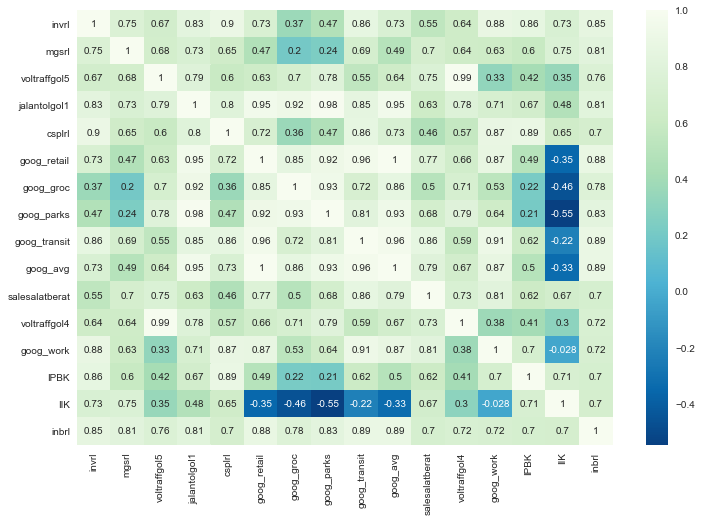

In [40]:
inbrlcorr = inbrlcor.corr()
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('seaborn')
sns.heatmap(data=inbrlcorr, annot=True, cmap='GnBu_r')
plt.show()

#invrl, mgsrl, jalantolgol1, goog_retail, goog_parks, goog_transit, goog_avg

In [52]:
data = inhrlcor
data.head()

,gdprl,csplrl,csprl,invrl,IKE,devisa_transpor,devisa_travel,jalantolgol1,mobilsales,motorsales,IKK,IPBK,IPAMM,IIK,goog_work,inhrl
period,,,,,,,,,,,,,,,,
0,6.110087,5.780286,5.547299,6.986212,110.9,NaN,NaN,NaN,76427,645863,119.2,NaN,NaN,NaN,NaN,5.456052
1,6.110087,5.780286,5.547299,6.986212,103.5,NaN,NaN,NaN,86486,666136,111.7,NaN,NaN,NaN,NaN,5.456052
2,6.110087,5.780286,5.547299,6.986212,102.4,NaN,NaN,NaN,87917,619678,107.3,NaN,NaN,NaN,NaN,5.456052
3,6.207811,6.967163,5.511730,10.131111,97.6,NaN,NaN,NaN,87144,617508,102.5,NaN,NaN,NaN,NaN,6.618118
4,6.207811,6.967163,5.511730,10.131111,103.8,NaN,NaN,NaN,95541,611251,109.0,NaN,NaN,NaN,NaN,6.618118


In [53]:
data = data[data.columns].pct_change(periods=12)

In [61]:
data2 = data.dropna()

In [62]:
data2

,gdprl,csplrl,csprl,invrl,IKE,devisa_transpor,devisa_travel,jalantolgol1,mobilsales,motorsales,IKK,IPBK,IPAMM,IIK,goog_work,inhrl
period,,,,,,,,,,,,,,,,


In [104]:
##gdprl,csplrl, csprl, invrl, IKE, devisa_transpor, devisa_rravel, IPBK, IPAMM
data = df.drop(columns=['cslrl', 'csgrl','xgsrl','mgsrl','inbrl','retailsales','sukucadang','manminrok','bbm',
                       'gadget','perlengkapanrt','barangbudaya','baranglain','barangsandang', 'onlinesales', 'onlinetranspr', 'mobilsales',
       'motorsales', 'konsumsiskn', 'tariktunai', 'belanjadebet',
       'tariktunaicc', 'ntp', 'wageburuh', 'wageart', 'wagebarber',
       'wagetukang', 'ihsg', 'yield1y', 'IHPRsekunder', 'DPKindividu',
       'KreditKonsumsi', 'JobVacancy', 'IKK', 'IEK', 'jalantolgol1',
       'inflasipendidikan', 'inflasikesehatan',
       'semensales', 'imporkonstruksi', 'orderbook',
       'voltraffgol3', 'voltraffgol5', 'presalesprop', 'pmi', 'salesalatberat',
       'kredit_mk', 'kredit_inv', 'voltraffgol4', 'rtgs', 'prod_motor',
       'ekspor_nm_rl', 'impor_nm_rl', 'ekspor_nm_pi', 'impor_nm_pi',
       'ekspor_mg_nl', 'impor_mg_nl', 'sup_valas_jl', 'sup_valas_bl',
       'goog_retail', 'goog_groc', 'goog_parks', 'goog_transit', 'goog_work',
       'goog_res', 'goog_avg','ITP', 'IIK'])
data

,gdprl,csplrl,csprl,invrl,inhrl,IKE,devisa_transpor,devisa_travel,IPBK,IPAMM
period,,,,,,,,,,
2012-01-01,6.110087,5.780286,5.547299,6.986212,5.456052,110.900000,NaN,NaN,NaN,NaN
2012-02-01,6.110087,5.780286,5.547299,6.986212,5.456052,103.500000,NaN,NaN,NaN,NaN
2012-03-01,6.110087,5.780286,5.547299,6.986212,5.456052,102.400000,NaN,NaN,NaN,NaN
2012-04-01,6.207811,6.967163,5.511730,10.131111,6.618118,97.600000,NaN,NaN,NaN,NaN
2012-05-01,6.207811,6.967163,5.511730,10.131111,6.618118,103.800000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-3.485374,-4.001398,-4.046090,-6.479756,-5.600000,54.135689,18.0,447.0,37.466078,27.929502
2020-10-01,-2.194768,-3.582511,-3.614345,-6.151957,-6.633814,51.463568,18.0,447.0,40.786587,34.514693
2020-11-01,-2.194768,-3.582511,-3.614345,-6.151957,-6.633814,60.142087,18.0,447.0,43.031193,35.586534


In [105]:
data = data[data.columns].pct_change(periods=12)
data

,gdprl,csplrl,csprl,invrl,inhrl,IKE,devisa_transpor,devisa_travel,IPBK,IPAMM
period,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-1.696179,-1.791276,-1.808162,-2.538582,-2.113372,-0.496362,-0.866245,-0.697378,-0.335430,-0.502391
2020-10-01,-1.442747,-1.725825,-1.727630,-2.509009,-2.200543,-0.508702,-0.862815,-0.710776,-0.267617,-0.379310
2020-11-01,-1.442747,-1.725825,-1.727630,-2.509009,-2.200543,-0.449609,-0.862847,-0.683091,-0.219338,-0.375008


In [106]:
data = data.dropna()
data

,gdprl,csplrl,csprl,invrl,inhrl,IKE,devisa_transpor,devisa_travel,IPBK,IPAMM
period,,,,,,,,,,
2019-01-01,-0.001846,0.048875,0.012161,-0.365347,-0.104396,-0.038828,0.024707,-0.052387,0.068628,0.067441
2019-02-01,-0.001846,0.048875,0.012161,-0.365347,-0.104396,-0.024962,-0.037316,-0.143899,0.083574,0.070257
2019-03-01,-0.001846,0.048875,0.012161,-0.365347,-0.104396,-0.011896,-0.082424,-0.199855,0.077872,0.027032
2019-04-01,-0.041232,0.028263,0.001529,-0.215548,0.100750,0.011104,-0.018630,-0.181933,0.034442,0.101011
2019-05-01,-0.041232,0.028263,0.001529,-0.215548,0.100750,-0.023002,-0.063007,-0.206073,0.053796,0.077172
2019-06-01,-0.041232,0.028263,0.001529,-0.215548,0.100750,-0.050325,0.113571,-0.115676,0.154187,0.225680
2019-07-01,-0.032236,-0.003855,0.000911,-0.391272,-0.102556,-0.032840,-0.069469,-0.182583,0.042441,0.160495
2019-08-01,-0.032236,-0.003855,0.000911,-0.391272,-0.102556,0.009448,-0.160414,-0.112611,-0.019177,0.168351
2019-09-01,-0.032236,-0.003855,0.000911,-0.391272,-0.102556,-0.024995,0.059432,0.045121,-0.012178,0.087383


In [107]:
scal = StandardScaler()
scaler = scal.fit_transform(data.values)
scaler

array([[ 0.92123233,  0.95487489,  0.91172344,  0.79636159,  0.77943321,
         0.71788285,  0.98057102,  0.80894277,  1.18465587,  0.83669113],
       [ 0.92123233,  0.95487489,  0.91172344,  0.79636159,  0.77943321,
         0.77694484,  0.83546426,  0.52459572,  1.28708182,  0.84667061],
       [ 0.92123233,  0.95487489,  0.91172344,  0.79636159,  0.77943321,
         0.83259667,  0.72993093,  0.35072951,  1.24800591,  0.69346562],
       [ 0.87314355,  0.93215163,  0.90002809,  0.91470152,  0.96866103,
         0.93056595,  0.87918063,  0.40641576,  0.95037551,  0.9556757 ],
       [ 0.87314355,  0.93215163,  0.90002809,  0.91470152,  0.96866103,
         0.78529359,  0.77535813,  0.33140751,  1.08300712,  0.87117965],
       [ 0.87314355,  0.93215163,  0.90002809,  0.91470152,  0.96866103,
         0.66891606,  1.18847758,  0.61229034,  1.77099192,  1.39754465],
       [ 0.88412744,  0.8967456 ,  0.8993483 ,  0.77588041,  0.78113037,
         0.74338966,  0.76023844,  0.40439747

In [108]:
data = pd.DataFrame(scaler, columns = data.columns, index = data.index)
data

,gdprl,csplrl,csprl,invrl,inhrl,IKE,devisa_transpor,devisa_travel,IPBK,IPAMM
period,,,,,,,,,,
2019-01-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.717883,0.980571,0.808943,1.184656,0.836691
2019-02-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.776945,0.835464,0.524596,1.287082,0.846671
2019-03-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.832597,0.729931,0.350730,1.248006,0.693466
2019-04-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.930566,0.879181,0.406416,0.950376,0.955676
2019-05-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.785294,0.775358,0.331408,1.083007,0.871180
2019-06-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.668916,1.188478,0.612290,1.770992,1.397545
2019-07-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.743390,0.760238,0.404397,1.005191,1.166508
2019-08-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.923513,0.547465,0.621812,0.582928,1.194351
2019-09-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.776806,1.061814,1.111919,0.630887,0.907371


In [109]:
data = data.fillna(method = 'pad')
data

,gdprl,csplrl,csprl,invrl,inhrl,IKE,devisa_transpor,devisa_travel,IPBK,IPAMM
period,,,,,,,,,,
2019-01-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.717883,0.980571,0.808943,1.184656,0.836691
2019-02-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.776945,0.835464,0.524596,1.287082,0.846671
2019-03-01,0.921232,0.954875,0.911723,0.796362,0.779433,0.832597,0.729931,0.350730,1.248006,0.693466
2019-04-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.930566,0.879181,0.406416,0.950376,0.955676
2019-05-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.785294,0.775358,0.331408,1.083007,0.871180
2019-06-01,0.873144,0.932152,0.900028,0.914702,0.968661,0.668916,1.188478,0.612290,1.770992,1.397545
2019-07-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.743390,0.760238,0.404397,1.005191,1.166508
2019-08-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.923513,0.547465,0.621812,0.582928,1.194351
2019-09-01,0.884127,0.896746,0.899348,0.775880,0.781130,0.776806,1.061814,1.111919,0.630887,0.907371


Text(0.5, 1.0, 'inhrl')

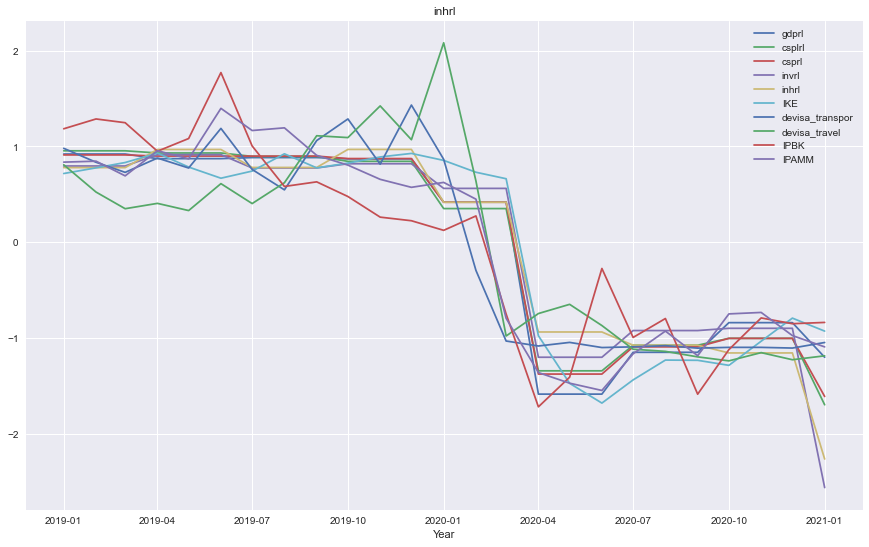

In [110]:
fig, ax = plt.subplots(figsize = (15,9))
col = data.columns
for i in data.columns:
    ax.plot(data[i],label=i)
ax.legend()
ax.set_xlabel('Year')
ax.set_title('inhrl')

In [111]:
x_train = data[:'2020-06-01'].drop(['gdprl'], axis = 1)
y_train = data.loc[:'2020-06-01', 'gdprl']
x_test = data['2020-07-01':'2021-01-01'].drop(['gdprl'], axis = 1)
y_test = data.loc['2020-07-01':'2021-01-01', 'gdprl']

In [112]:
trans = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = trans.fit_transform(x_train)
x_test_poly = trans.fit_transform(x_test)

In [113]:
column_xtrain = trans.get_feature_names(x_train.columns)
column_xtest = trans.get_feature_names(x_test.columns)

In [114]:
x_train_model = pd.DataFrame(x_train_poly, columns = column_xtrain, index = x_train.index)
x_test_model = pd.DataFrame(x_test_poly, columns = column_xtest, index = x_test.index)

In [124]:
tscv = TimeSeriesSplit(n_splits=11)

# ELastic Net

In [116]:
parameter_elastic={
    'elastic__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9],
    'elastic__l1_ratio':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'elastic__tol':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
}

In [117]:
pipe_elastic = Pipeline([('elastic', ElasticNet())])

In [127]:
grid_search_elastic = GridSearchCV(pipe_elastic, parameter_elastic, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_elastic.fit(x_train, y_train)
best_score_elastic = grid_search_elastic.best_score_
best_model_elastic = grid_search_elastic.best_estimator_

In [128]:
best_score_elastic

-0.0908490903260163

In [129]:
best_model_elastic

Pipeline(steps=[('elastic', ElasticNet(alpha=1e-05, l1_ratio=1e-09, tol=0.2))])

In [140]:
y_true_elastic

array([-1.1474722 , -1.1474722 , -1.1474722 , -0.83804317, -0.83804317,
       -0.83804317, -1.19906896])

In [141]:
y_pred_elastic

array([-1.27535335, -1.2780426 , -1.25162356, -1.18835211, -1.19121567,
       -1.18773264, -1.9596306 ])

In [132]:
y_true_elastic = y_test.values
y_pred_elastic = best_model_elastic.predict(x_test)
regression_result(y_true_elastic, y_pred_elastic)

0.3765

In [134]:
y_true_elastic_2 = y_train.values
y_pred_elastic_2 = best_model_elastic.predict(x_train)

In [135]:
actual_elnet = np.concatenate((y_true_elastic_2, y_true_elastic))
prediction_elnet = np.concatenate((y_pred_elastic_2, y_pred_elastic))

Text(0.5, 1.0, 'Investasi Bangunan')

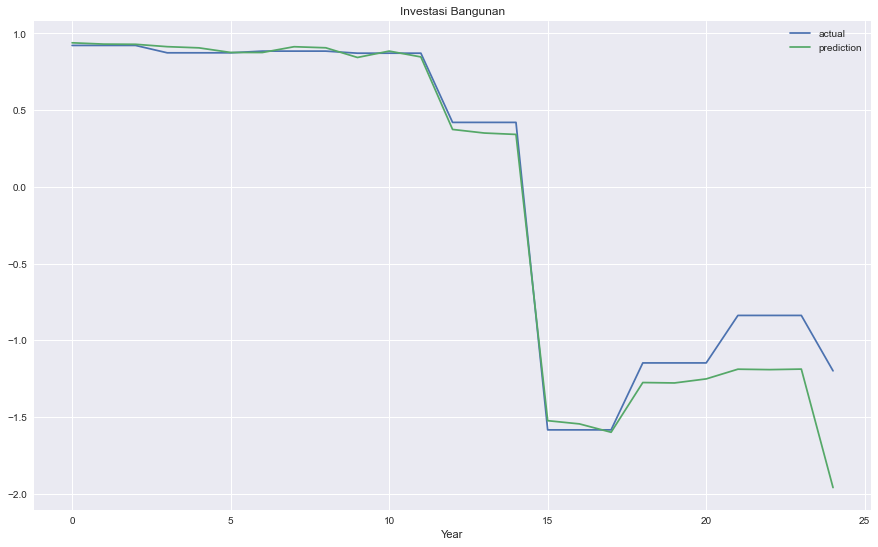

In [139]:
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(actual_elnet,label='actual')
ax.plot(prediction_elnet,label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_title('Investasi Bangunan')

rmse training =  0.016125769384689025 
rmse testing =  0.439591603813774


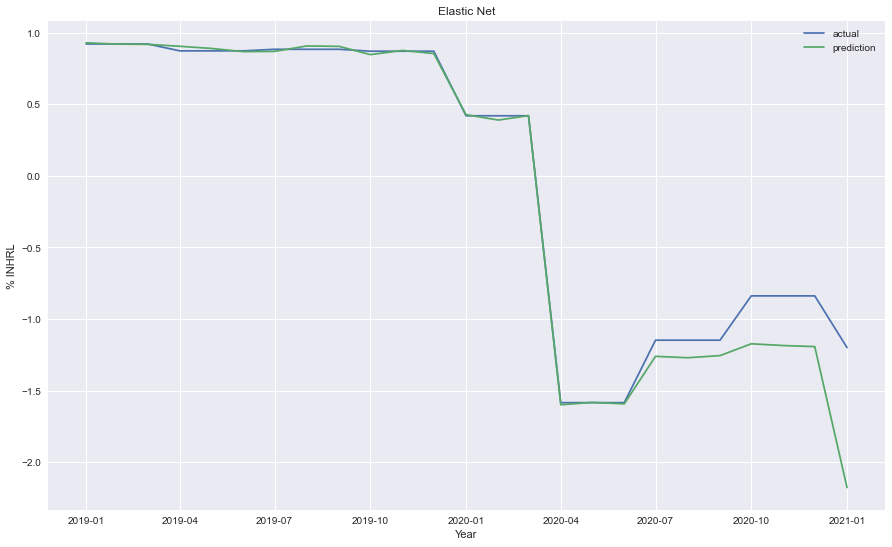

In [143]:
# Elastic Net
# model running
elnet = ElasticNet(alpha=1e-05, l1_ratio=1e-09, tol=0.2)
elnet_train = elnet.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_elnet = np.concatenate((elnet_train.predict(x_train_model),elnet_train.predict(x_test_model)))
yact_elnet = np.concatenate((y_train.values, y_test.values))

# plotting
df_elnet = pd.DataFrame(
    {'period': data.index, 'actual': yact_elnet, 'prediction': ypred_elnet})
df_elnet.index = df_elnet['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_elnet['actual'],label='actual')
ax.plot(df_elnet['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL')
ax.set_title('Elastic Net')

#rmse
rmse_elnet_train = rmse(elnet_train.predict(x_train_model), y_train.values)
rmse_elnet_test = rmse(elnet_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_elnet_train, 
      '\nrmse testing = ',
      rmse_elnet_test)

In [144]:
ypred_elnet

array([ 0.92942872,  0.92002083,  0.91871514,  0.90502266,  0.89028986,
        0.86765813,  0.86942634,  0.90726966,  0.90457704,  0.84694033,
        0.87612097,  0.85441599,  0.42735793,  0.38991703,  0.42070328,
       -1.59845469, -1.58177417, -1.59201999, -1.2602837 , -1.26994154,
       -1.25506761, -1.17265509, -1.18485193, -1.19229521, -2.17664123])

# XGboost

In [152]:
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
parameter_xgb = {
    "xgb__eta" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
    'xgb__min_child_weight':[1,2,3,4,5], 
    'xgb__gamma':[i/10.0 for i in range(3,6)], 
    'xgb__subsample':[i/10.0 for i in range(6,11)], #sampling baris
    'xgb__colsample_bytree':[i/10.0 for i in range(6,11)],  
    'xgb__max_depth': max_depth,}

xgb = xg.XGBRegressor()

pipe_xgb = Pipeline([('xgb', xgb)])

In [154]:
grid_search_xgb = GridSearchCV(pipe_xgb, parameter_xgb, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_xgb.fit(x_train, y_train)
best_score_xgb = grid_search_xgb.best_score_
best_model_xgb = grid_search_xgb.best_estimator_

In [155]:
best_score_xgb

-0.4110033713685386

In [156]:
best_model_xgb

Pipeline(steps=[('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.9, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [160]:
xg = XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.6, eta=0.3, gamma=0.3,
                              gpu_id=-1, importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=100, min_child_weight=1,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=0.9, tree_method='exact',
                              validate_parameters=1, verbosity=None)
xg_train = xg.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_xg = np.concatenate((xg_train.predict(x_train_model),xg_train.predict(x_test_model)))
yact_xg = np.concatenate((y_train.values, y_test.values))

rmse training =  0.13119096629818763 
rmse testing =  0.3209579952613906


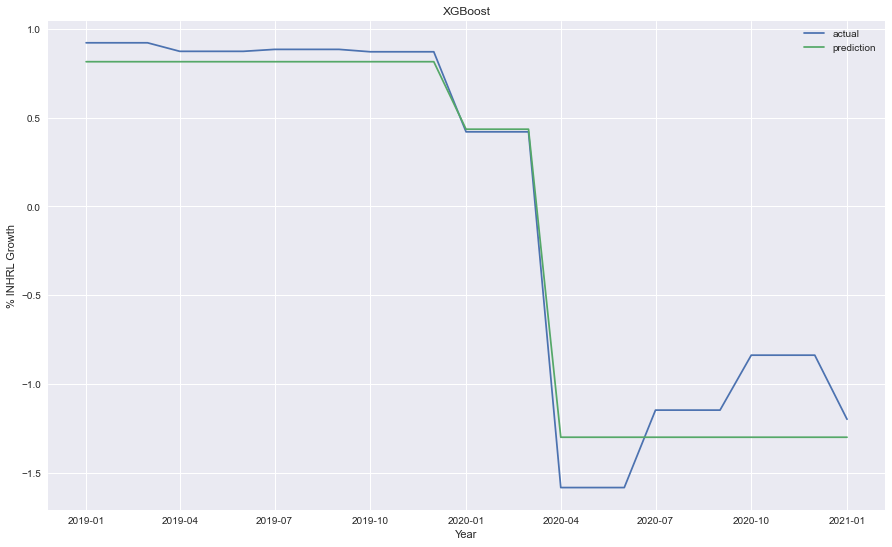

In [161]:
df_xg = pd.DataFrame(
    {'period': data.index, 'actual': yact_xg, 'prediction': ypred_xg})
df_xg.index = df_xg['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_xg['actual'],label='actual')
ax.plot(df_xg['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('XGBoost')

#rmse
rmse_xg_train = rmse(xg_train.predict(x_train_model), y_train.values)
rmse_xg_test = rmse(xg_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_xg_train, 
      '\nrmse testing = ',
      rmse_xg_test)

# SVR

In [162]:
parameter_svr = {
    'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__degree' : [x for x in range(0,5)],
    'svr__gamma' : ['scale', 'auto']
}
pipe_svr = Pipeline([('svr', SVR())])


In [164]:
grid_search_svr = GridSearchCV(pipe_svr, parameter_svr, cv=tscv, n_jobs=-1, scoring=rmse_score)
grid_search_svr.fit(x_train, y_train)
best_score_svr = grid_search_svr.best_score_
best_model_svr = grid_search_svr.best_estimator_

In [165]:
best_score_svr

-0.21386392066270082

In [166]:
best_model_svr

Pipeline(steps=[('svr', SVR(degree=0, kernel='linear'))])

In [ ]:
y_true_svr = y_test.values
y_pred_svr = best_model_svr.predict(X_test)
regression_result(y_true_svr, y_pred_svr)

y_true_svr_2 = y_train.values
y_pred_svr_2 = best_model_svr.predict(X_train)

actual = np.concatenate((y_true_svr_2, y_true_svr))
prediction = np.concatenate((y_pred_svr_2, y_pred_svr))

fig, ax = plt.subplots(figsize = (15,9))
ax.plot(actual,label='actual')
ax.plot(prediction,label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_title('GDP')


In [167]:
# model running
svm = SVR(degree=0, kernel='linear')
svm_train = svm.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_svm = np.concatenate((svm_train.predict(x_train_model),svm_train.predict(x_test_model)))
yact_svm = np.concatenate((y_train.values, y_test.values))

rmse training =  0.08185994024486289 
rmse testing =  0.2619533328763466


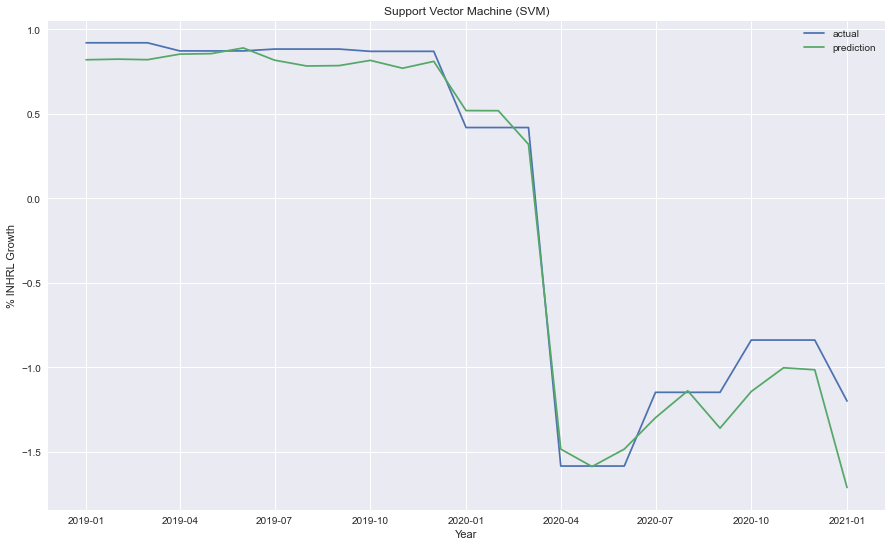

In [169]:
df_svm = pd.DataFrame(
    {'period': data.index, 'actual': yact_svm, 'prediction': ypred_svm})
df_svm.index = df_svm['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_svm['actual'],label='actual')
ax.plot(df_svm['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% INHRL Growth')
ax.set_title('Support Vector Machine (SVM)')

#rmse
rmse_svm_train = rmse(svm_train.predict(x_train_model), y_train.values)
rmse_svm_test = rmse(svm_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_svm_train, 
      '\nrmse testing = ',
      rmse_svm_test)

# Random Forest

In [170]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
parameter_rfr = {
    'rfr__n_estimators': n_estimators,
    'rfr__max_features': max_features,
    'rfr__max_depth': max_depth
}

In [171]:
pipe_rfr = Pipeline([('rfr', RandomForestRegressor())])
grid_search_rfr = GridSearchCV(pipe_rfr, parameter_rfr, cv=tscv, n_jobs=1, scoring=rmse_score)
grid_search_rfr.fit(x_train, y_train)
best_score_rfr = grid_search_rfr.best_score_
best_model_rfr = grid_search_rfr.best_estimator_

In [172]:
best_score_rfr

-0.36700172377398543

In [173]:
best_model_rfr

Pipeline(steps=[('rfr',
                 RandomForestRegressor(max_depth=500, max_features='sqrt',
                                       n_estimators=400))])

In [ ]:
y_true_rfr = y_test.values
y_pred_rfr = best_model_rfr.predict(X_test)
regression_result(y_true_rfr, y_pred_rfr)

y_true_rfr_2 = y_train.values
y_pred_rfr_2 = best_model_rfr.predict(X_train)

In [ ]:
actual_rfr = np.concatenate((y_true_rfr_2, y_true_rfr))
prediction_rfr = np.concatenate((y_pred_rfr_2, y_pred_rfr))


In [ ]:
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(actual_rfr,label='actual')
ax.plot(prediction_rfr,label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_title('GDP')

In [174]:
# model running
rf = RandomForestRegressor(max_depth=500, max_features='sqrt',
                                       n_estimators=400)
rf_train = rf.fit(x_train_model, y_train)

# memasukkan data test dan data train ke model
ypred_rf = np.concatenate((rf_train.predict(x_train_model),rf_train.predict(x_test_model)))
yact_rf = np.concatenate((y_train.values, y_test.values))

rmse training =  0.10050482480677059 
rmse testing =  0.7853013695031723


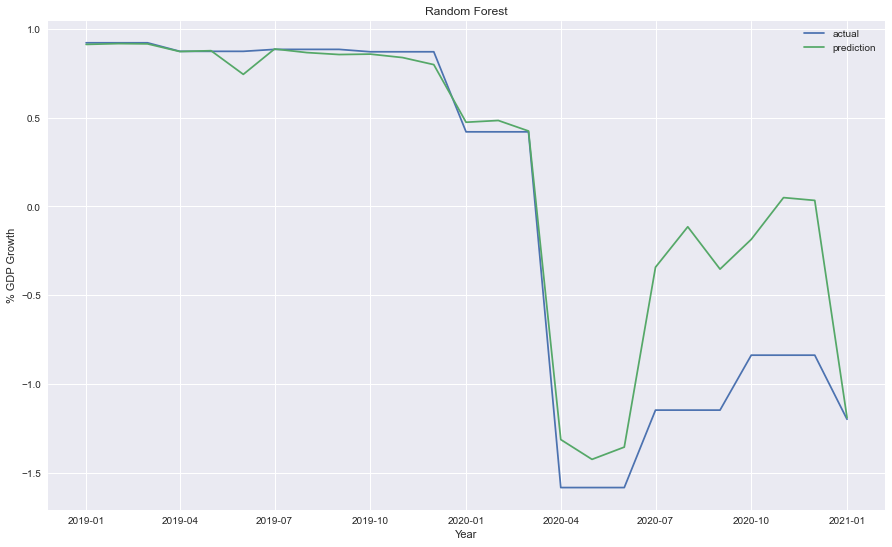

In [179]:
# plotting
df_rf = pd.DataFrame(
    {'period': data.index, 'actual': yact_rf, 'prediction': ypred_rf})
df_rf.index = df_rf['period']
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(df_rf['actual'],label='actual')
ax.plot(df_rf['prediction'],label='prediction')
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('% GDP Growth')
ax.set_title('Random Forest')

#rmse
rmse_rf_train = rmse(rf_train.predict(x_train_model), y_train.values)
rmse_rf_test = rmse(rf_train.predict(x_test_model),y_test.values)
print('rmse training = ',
      rmse_rf_train, 
      '\nrmse testing = ',
      rmse_rf_test)

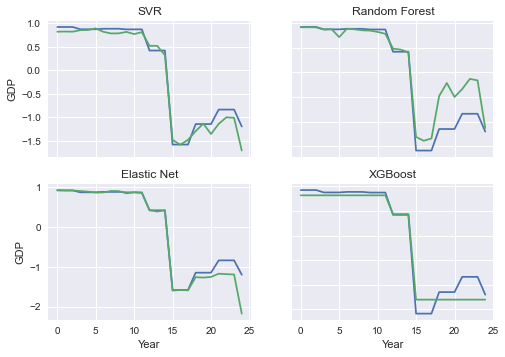

In [177]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(yact_svm)
axs[0, 0].plot(ypred_svm)
axs[0, 0].set_title('SVR')
axs[0, 1].plot(yact_rf)
axs[0, 1].plot(ypred_rf)
axs[0, 1].set_title('Random Forest')
axs[1, 0].plot(yact_elnet)
axs[1, 0].plot(ypred_elnet)
axs[1, 0].set_title('Elastic Net')
axs[1, 1].plot(yact_xg)
axs[1, 1].plot(ypred_xg)
axs[1, 1].set_title('XGBoost')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='GDP')
    
for ax in axs.flat:
    ax.label_outer()